In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Below is shown the original dataset. Notice that it has not column names



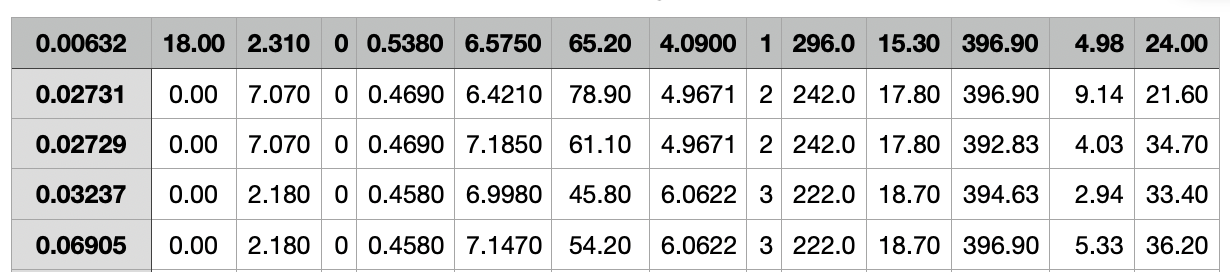

In [ ]:
# Load the data using Pandas. First, we name the columns. Then we load the data.
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX',
    'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
    'B', 'LSTAT', 'MEDV'
]

In [ ]:
# Now load the data
df = pd.read_csv("housing.csv", header=None, delimiter=r"\s+", names=column_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Determine the labels, the label column vector and the feature matrices
target_col = "MEDV"  # The labels
X_all = df.drop(columns=[target_col]) # The feature matrix (we drop the labels)
y_all = df[target_col] # The label column vector

In [ ]:
# Split the data in training and test sets. Using here 80% train and 20% test
X_train_base, X_test, y_train_base, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42
)

In [ ]:
# Fix the number of times we're going to split the training set (n_runs).
# Also, create a list, called all_predictions = [] and which is empty at first,
# to store all the predictions.
n_runs = 30
all_predictions = []

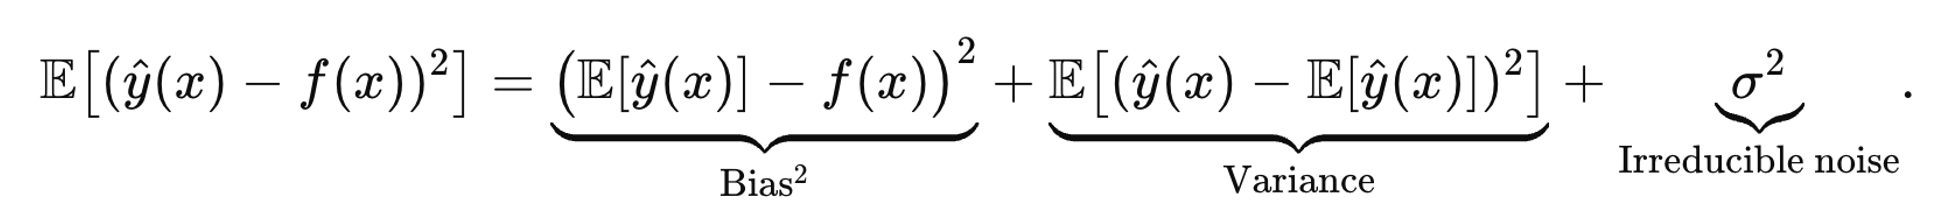

In [ ]:
# Now, split the training set, just the training set, n_run times, and use a different
# seed each time so the splitting is random
# Notice the use of _
# For each training set, run the model and store the preditions in the
# list all_predictions. Then convert this list into a numpy array

for seed in range(n_runs):
    X_train, _, y_train, _ = train_test_split(
        X_train_base, y_train_base, test_size= 0.5, random_state=seed
    )
    model = LinearRegression()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    all_predictions.append(preds)

all_predictions = np.array(all_predictions) # shape (n_runs, n_test)

In [ ]:
# Now compute the Bias^2 and the variance
mean_preds = all_predictions.mean(axis=0)           # E[ŷ(x)] for each test x
bias_squared = ((mean_preds - y_test.values) ** 2)  # per sample bias^2
variance = all_predictions.var(axis=0)              # per sample variance

In [ ]:
# Now average accross all test samples
avg_bias2 = bias_squared.mean()
avg_var   = variance.mean()

# The images below show the terms we just computed above

 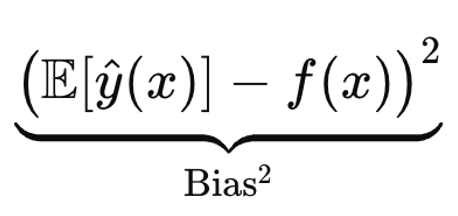

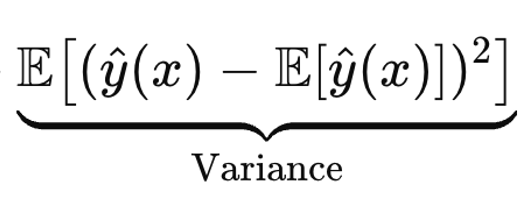

In [ ]:
# Now compute the MSE error (it contains the irreducible noise)
mse_runs = [mean_squared_error(y_test, p) for p in all_predictions]
avg_mse  = np.mean(mse_runs)

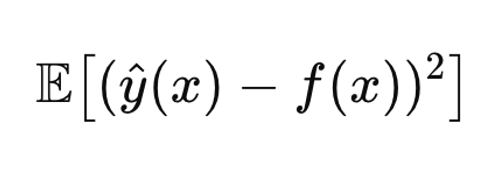

In [ ]:
# Print your results
print(f"Average Test MSE : {avg_mse:.4f}")
print(f"Average Bias^2   : {avg_bias2:.4f}")
print(f"Average Variance : {avg_var:.4f}")
print(f"Bias^2 + Variance: {avg_bias2 + avg_var:.4f}")
print()
print("The gap (MSE - (Bias^2 + Var)) is the irreducible noise σ².")

Average Test MSE : 26.7715
Average Bias^2   : 25.5475
Average Variance : 1.2240
Bias^2 + Variance: 26.7715

The gap (MSE - (Bias^2 + Var)) is the irreducible noise σ².
